# Setup

In [13]:
# Some code taken from https://github.com/ageron/handson-ml2

import sys
assert sys.version_info >= (3, 8)
import os

import sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
assert sklearn.__version__ >= "0.23.1"

import numpy as np
assert np.__version__ >= "1.19.1"

import seaborn as sns
assert sns.__version__ >= "0.10.1"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load data

In [14]:
do_standardize = True
pt_method = 'box-cox'

In [15]:
import pandas as pd
assert pd.__version__ >= "1.1.0"

# Model will be trained using this data.
def load_training_data():
    data = pd.read_csv('../data/titanic/train.csv')
    return data

# This data will only be used when submitting the final analysis.
# It also doesn't contain the Survived column.
def load_testing_data():
    data = pd.read_csv('../data/titanic/test.csv')
    return data

In [16]:
train_df = load_training_data()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Fare'>

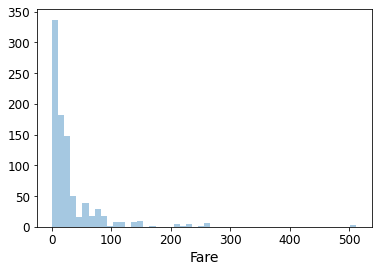

In [17]:
# original_df is being used to look at the effects of individual transformations
original_df = train_df.copy()
sns.distplot(train_df.Fare, kde=False)

In [18]:
# Divide the Fare to be per person
train_df['Fare'] = train_df.groupby('Ticket')['Fare'].transform(lambda x: x / x.size)

In [19]:
pd.DataFrame(train_df.groupby('Ticket')['Fare'].transform(lambda x: x / x.size))

,Fare
0,7.2500
1,71.2833
2,7.9250
3,13.2750
4,8.0500
...,...
886,13.0000
887,30.0000
888,5.8625
889,30.0000


In [20]:
train_df.compare(original_df)

Fare         
         self    other
3    26.55000  53.1000
7     5.26875  21.0750
8     3.71110  11.1333
9    15.03540  30.0708
10    8.35000  16.7000
..        ...      ...
876   4.92290   9.8458
879  41.57915  83.1583
880  13.00000  26.0000
885   5.82500  29.1250
888  11.72500  23.4500

[337 rows x 2 columns]

In [21]:
original_df = train_df.copy()

In [22]:
si = SimpleImputer(missing_values=0.0, strategy='median')
train_df['Fare'] = si.fit_transform(train_df[['Fare']])

In [23]:
train_df.compare(original_df)

Fare      
      self other
179  9.225   0.0
263  9.225   0.0
271  9.225   0.0
277  9.225   0.0
302  9.225   0.0
413  9.225   0.0
466  9.225   0.0
481  9.225   0.0
597  9.225   0.0
633  9.225   0.0
674  9.225   0.0
732  9.225   0.0
806  9.225   0.0
815  9.225   0.0
822  9.225   0.0

<AxesSubplot:xlabel='Fare'>

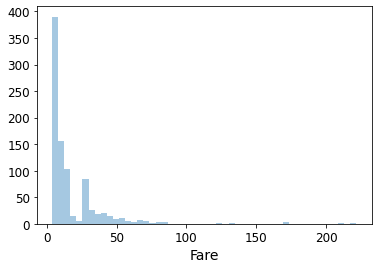

In [24]:
sns.distplot(train_df.Fare, kde=False)

In [25]:
original_df = train_df.copy()

In [26]:
pt = PowerTransformer(method=pt_method, standardize=do_standardize)
pt.fit(train_df[['Fare']])
train_df['Fare'] = pt.transform(train_df[['Fare']])

<AxesSubplot:xlabel='Fare'>

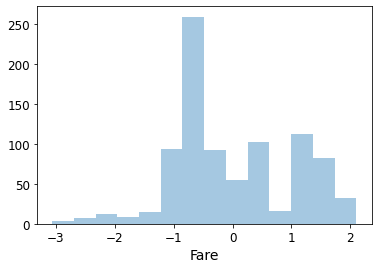

In [27]:
sns.distplot(train_df.Fare, kde=False)

<AxesSubplot:xlabel='Age'>

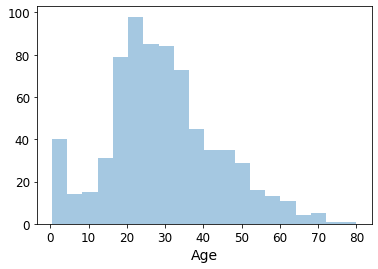

In [28]:
original_df = train_df.copy()
sns.distplot(train_df.Age, kde=False)

In [29]:
si = SimpleImputer(strategy='median')
train_df['Age'] = si.fit_transform(train_df[['Age']])

Age      
     self other
5    28.0   NaN
17   28.0   NaN
19   28.0   NaN
26   28.0   NaN
28   28.0   NaN
..    ...   ...
859  28.0   NaN
863  28.0   NaN
868  28.0   NaN
878  28.0   NaN
888  28.0   NaN

[177 rows x 2 columns]

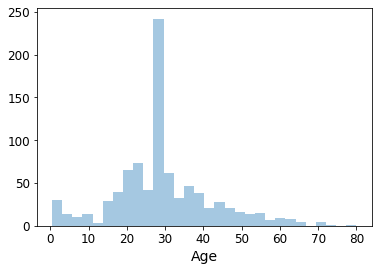

In [30]:
sns.distplot(train_df.Age, kde=False)
train_df.compare(original_df)

In [31]:
pt = PowerTransformer(method=pt_method, standardize=do_standardize)
pt.fit(train_df[['Age']])
train_df['Age'] = pt.transform(train_df[['Age']])

<AxesSubplot:xlabel='Age'>

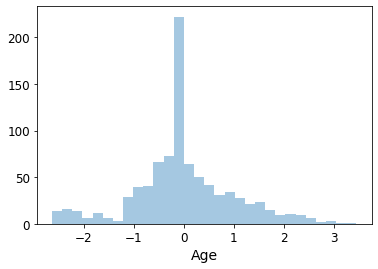

In [32]:
sns.distplot(train_df.Age, kde=False)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [35]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
train_df.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
D37            1
B102           1
D19            1
D47            1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [37]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,1.275947e-16,0.523008,0.381594,-1.176263e-15
std,257.353842,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,-2.636349e+00,0.000000,0.000000,-3.064306e+00
25%,223.500000,0.000000,2.000000,-5.210129e-01,0.000000,0.000000,-6.874477e-01
50%,446.000000,0.000000,3.000000,-5.307182e-02,0.000000,0.000000,-3.086412e-01
75%,668.500000,1.000000,3.000000,4.677283e-01,1.000000,0.000000,1.090357e+00
max,891.000000,1.000000,3.000000,3.447841e+00,8.000000,6.000000,2.103147e+00


Saving figure attribute_histogram_plots


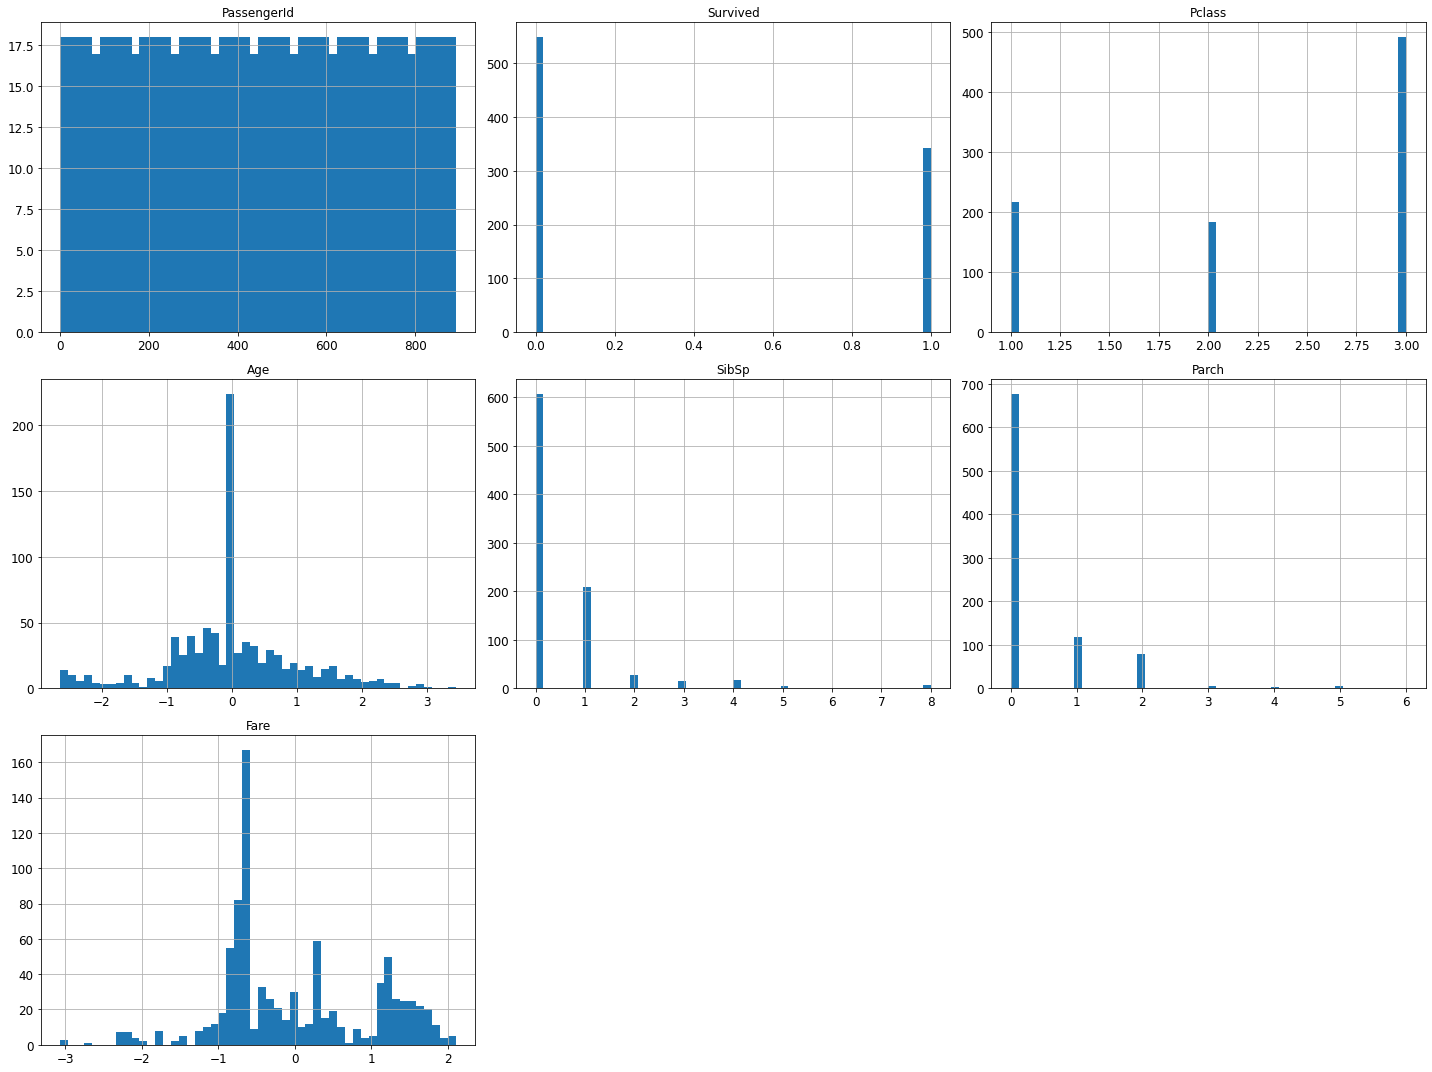

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [40]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [41]:
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

In [42]:
# This will be used the train and validate the model using cross-validation
len(train_set)

712

In [43]:
# This will only be used after training to see if the resulting model is any good
len(test_set)

179

In [44]:
# Make a copy of the training set so we can go back if we accidentally change it
passengers_df = train_set.copy()

In [45]:
corr_matrix = passengers_df.corr()

In [46]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.019979,-0.046175,0.029552,-0.069226,-0.000217,0.015240
Survived,0.019979,1.000000,-0.321750,-0.060484,-0.047602,0.078311,0.293369
Pclass,-0.046175,-0.321750,1.000000,-0.317227,0.086933,0.012679,-0.845479
Age,0.029552,-0.060484,-0.317227,1.000000,-0.255759,-0.215269,0.353671
SibSp,-0.069226,-0.047602,0.086933,-0.255759,1.000000,0.440355,-0.084982
Parch,-0.000217,0.078311,0.012679,-0.215269,0.440355,1.000000,-0.092386
Fare,0.015240,0.293369,-0.845479,0.353671,-0.084982,-0.092386,1.000000


In [47]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.293369
Parch          0.078311
PassengerId    0.019979
SibSp         -0.047602
Age           -0.060484
Pclass        -0.321750
Name: Survived, dtype: float64

In [48]:
# Fare has a rather large positive correlation
# Pclass has a rather large negative correlation
# Parch and Age also

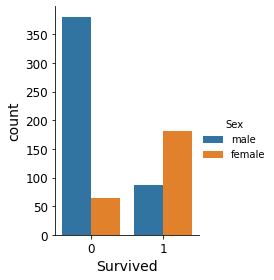

In [50]:
g = sns.catplot(x="Survived", hue="Sex",
                data=passengers_df, kind="count",
                height=4, aspect=.7);

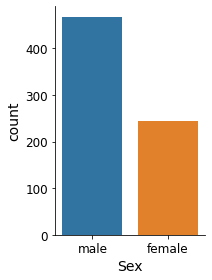

In [51]:
g = sns.catplot(x="Sex", data=passengers_df, kind="count",
                height=4, aspect=.7);

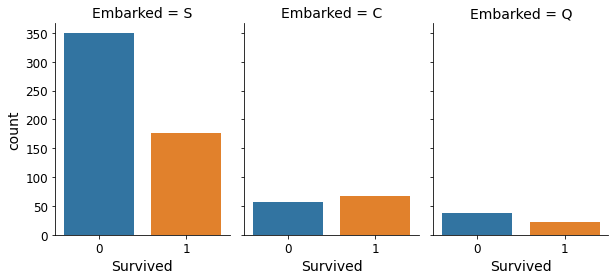

In [56]:
g = sns.catplot(x="Survived", col="Embarked",
                data=passengers_df, kind="count",
                height=4, aspect=.7);

In [37]:
# Ready to use attributes at this time
# Pclass
# Fare
# Age